In [1]:
import numpy as np
import pandas as pd
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_file = "~/Documents/python/project02/amazon_musical_instru_star_rev_only.tsv"
col_list = ["star_rating","review_body"]
#reviews_df = pd.read_csv(data_file, sep="\t", usecols=col_list, low_memory=False)
reviews_df = pd.read_csv(data_file, sep="\t", usecols=col_list, nrows=20000)

In [3]:
reviews_df['star_rating'] = reviews_df['star_rating'].fillna(0)
reviews_df['review_body'] = reviews_df['review_body'].fillna('')

In [ ]:
reviews_df.head(15)

In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   star_rating  20000 non-null  int64 
 1   review_body  20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [ ]:
reviews_df.tail(10)

In [6]:
# stats on the star rating for the 20,000 records
print("Min star:", reviews_df['star_rating'].min())
print("Max star:", reviews_df['star_rating'].max())
print("Average star:", reviews_df['star_rating'].mean())
print("Median star:", reviews_df['star_rating'].median())

Min star: 1
Max star: 5
Average star: 4.28765
Median star: 5.0


In [7]:
def count_words(data):
    return len(data.split())

In [8]:
# Count number of words for each review and add a column to the dataframe
word_count = []
for index, row in reviews_df.iterrows():
    word_count.append(count_words(reviews_df.iloc[index]['review_body']))
    
reviews_df["num_of_words"] = word_count

In [10]:
# Stats on Word Count for all reviews
print("Stats on word count for all reviews")
print("-----------------------------------")
print("Min number of words:", reviews_df['num_of_words'].min())
print("Max number of words:", reviews_df['num_of_words'].max())
print("Average number of words:", reviews_df['num_of_words'].mean())
print("Median number of words:", reviews_df['num_of_words'].median())

Stats on word count for all reviews
-----------------------------------
Min number of words: 0
Max number of words: 2163
Average number of words: 41.6003
Median number of words: 17.0


In [11]:
# number of reviews for each star rating
reviews_df.groupby(['star_rating']).count()

,review_body,num_of_words
star_rating,,
1,1482,1482
2,817,817
3,1402,1402
4,3064,3064
5,13235,13235


In [12]:
# analyzing One Star reviews
onestar_reviews_df = reviews_df[reviews_df['star_rating'] == 1]
onestar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 17 to 19962
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   star_rating   1482 non-null   int64 
 1   review_body   1482 non-null   object
 2   num_of_words  1482 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 46.3+ KB


In [13]:
# Stats on Word Count for one star reviews
print("Stats on word count for One Star Reviews")
print("----------------------------------------")
print("Min number of words:", onestar_reviews_df['num_of_words'].min())
print("Max number of words:", onestar_reviews_df['num_of_words'].max())
print("Average number of words:", onestar_reviews_df['num_of_words'].mean())
print("Median number of words:", onestar_reviews_df['num_of_words'].median())

Stats on word count for One Star Reviews
----------------------------------------
Min number of words: 0
Max number of words: 1477
Average number of words: 44.152496626180834
Median number of words: 25.0


In [14]:
# analyzing Two Star reviews
twostar_reviews_df = reviews_df[reviews_df['star_rating'] == 2]
twostar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 6 to 19993
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   star_rating   817 non-null    int64 
 1   review_body   817 non-null    object
 2   num_of_words  817 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.5+ KB


In [15]:
# Stats on Word Count for two star reviews
print("Stats on word count forTwo Star Reviews")
print("---------------------------------------")
print("Min number of words:", twostar_reviews_df['num_of_words'].min())
print("Max number of words:", twostar_reviews_df['num_of_words'].max())
print("Average number of words:", twostar_reviews_df['num_of_words'].mean())
print("Median number of words:", twostar_reviews_df['num_of_words'].median())

Stats on word count forTwo Star Reviews
---------------------------------------
Min number of words: 1
Max number of words: 506
Average number of words: 53.840881272949815
Median number of words: 31.0


In [16]:
# analyzing Three Star reviews
threestar_reviews_df = reviews_df[reviews_df['star_rating'] == 3]
threestar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 19959
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   star_rating   1402 non-null   int64 
 1   review_body   1402 non-null   object
 2   num_of_words  1402 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 43.8+ KB


In [17]:
# Stats on Word Count for three star reviews
print("Stats on word count for Three Star Reviews")
print("------------------------------------------")
print("Min number of words:", threestar_reviews_df['num_of_words'].min())
print("Max number of words:", threestar_reviews_df['num_of_words'].max())
print("Average number of words:", threestar_reviews_df['num_of_words'].mean())
print("Median number of words:", threestar_reviews_df['num_of_words'].median())

Stats on word count for Three Star Reviews
------------------------------------------
Min number of words: 1
Max number of words: 1483
Average number of words: 53.55135520684736
Median number of words: 26.0


In [18]:
# analyzing Four Star reviews
fourstar_reviews_df = reviews_df[reviews_df['star_rating'] == 4]
fourstar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3064 entries, 11 to 19998
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   star_rating   3064 non-null   int64 
 1   review_body   3064 non-null   object
 2   num_of_words  3064 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 95.8+ KB


In [19]:
# Stats on Word Count for four star reviews
print("Stats on word count for Four Star Reviews")
print("-----------------------------------------")
print("Min number of words:", fourstar_reviews_df['num_of_words'].min())
print("Max number of words:", fourstar_reviews_df['num_of_words'].max())
print("Average number of words:", fourstar_reviews_df['num_of_words'].mean())
print("Median number of words:", fourstar_reviews_df['num_of_words'].median())

Stats on word count for Four Star Reviews
-----------------------------------------
Min number of words: 0
Max number of words: 1623
Average number of words: 52.84595300261097
Median number of words: 23.0


In [20]:
# analyzing Five Star reviews
fivestar_reviews_df = reviews_df[reviews_df['star_rating'] == 5]
fivestar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13235 entries, 1 to 19999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   star_rating   13235 non-null  int64 
 1   review_body   13235 non-null  object
 2   num_of_words  13235 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 413.6+ KB


In [21]:
# Stats on Word Count for five star reviews
print("Stats on word count for Five Star Reviews")
print("-----------------------------------------")
print("Min number of words:", fivestar_reviews_df['num_of_words'].min())
print("Max number of words:", fivestar_reviews_df['num_of_words'].max())
print("Average number of words:", fivestar_reviews_df['num_of_words'].mean())
print("Median number of words:", fivestar_reviews_df['num_of_words'].median())

Stats on word count for Five Star Reviews
-----------------------------------------
Min number of words: 0
Max number of words: 2163
Average number of words: 36.689459765772575
Median number of words: 13.0


In [ ]:
ten_words_df = reviews_df[reviews_df['num_of_words'] <= 10]
ten_words_df.info()

In [ ]:
large_words_df = reviews_df[reviews_df['num_of_words'] >= 2000]
large_words_df.info()

In [22]:
y=reviews_df['star_rating']
x=reviews_df['num_of_words']


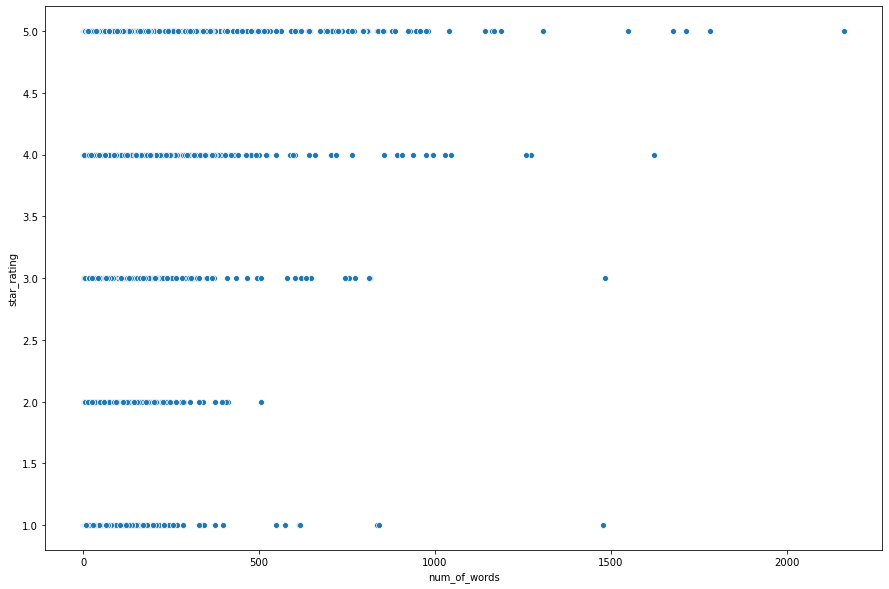

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(x,y)

Test area below

In [ ]:
print(count_words("This is not such a long sentence ya ?"))

In [ ]:
print(reviews_df.iloc[19912])
print(reviews_df.loc[19912, 'review_body'])

In [ ]:
## testing re functionality 
words = re.findall(['], "This isn't a crazy 22 test string . What exactly is it?")
print(words)
print(len(words))